# Credit Card Fraud Detection Project

## Overview
This notebook demonstrates the process of developing a machine learning model to detect fraudulent credit card transactions using various classification algorithms. The dataset is highly imbalanced, with fraudulent transactions constituting a very small fraction of all transactions, which presents a unique challenge for modeling.

## Table of Contents
1. [Introduction](#Introduction)
2. [Data Import and Overview](#Data-Import-and-Overview)
3. [Exploratory Data Analysis (EDA)](#Exploratory-Data-Analysis-(EDA))
4. [Data Preprocessing](#Data-Preprocessing)
5. [Model Selection and Training](#Model-Selection-and-Training)
6. [Model Evaluation](#Model-Evaluation)
7. [Feature Importance](#Feature-Importance)
8. [SHAP for Model interpretability](#SHAP-for-Model-interpretability)
9. [Hyperparameter Tuning](#Hyperparameter-Tuning)
10. [Model Deployment Plan](#Model-Deployment-Plan)
11. [Conclusion and Future Work](#Conclusion-and-Future-Work)


## Introduction

In this project, we aim to build a machine learning model capable of predicting fraudulent credit card transactions. The dataset used is highly imbalanced, with the majority of transactions being legitimate and only a small fraction being fraudulent. This imbalance poses a challenge, requiring special techniques to ensure the model does not become biased towards predicting only the majority class.

---


## Data Import and Overview

In this section, we import the necessary libraries and load the dataset to get an initial understanding of its structure.

In [154]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Load dataset

In [147]:
# Load the dataset
credit_card_data = pd.read_csv('creditcard.csv')

## Overview of the dataset

In [148]:
# Display basic information about the dataset
print(credit_card_data.info())

print(credit_card_data.describe())

print(credit_card_data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [149]:
# Displaying the first few records
credit_card_data.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Exploratory Data Analysis (EDA)

EDA helps us understand the dataset’s characteristics, uncover patterns, and identify potential issues that need addressing before modeling.

## Class Distribution

Visualizing the distribution of the target variable to understand the extent of class imbalance.

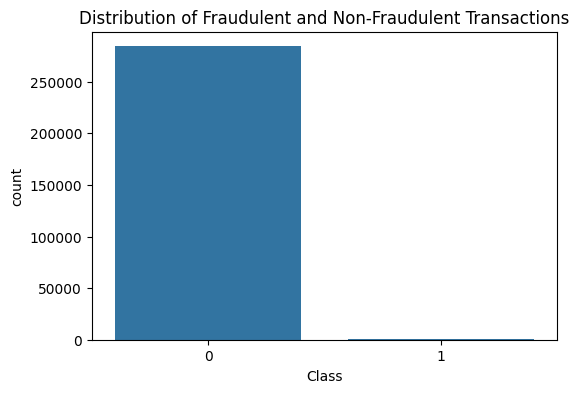

In [150]:
# Plot the distribution of the target variable 'Class'
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=credit_card_data)
plt.title('Distribution of Fraudulent and Non-Fraudulent Transactions')
plt.show()

## Feature Distributions

Understanding the distributions of key features such as ‘Time’ and ‘Amount’ to identify any preprocessing needs.

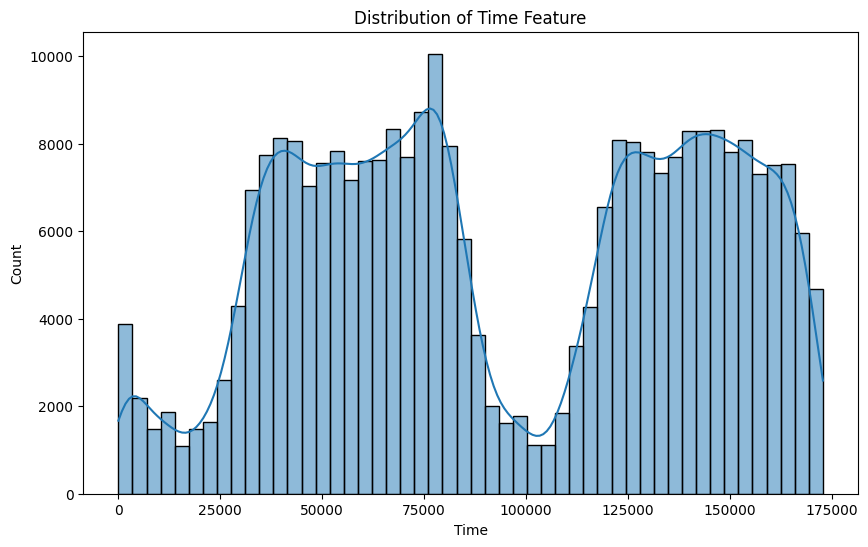

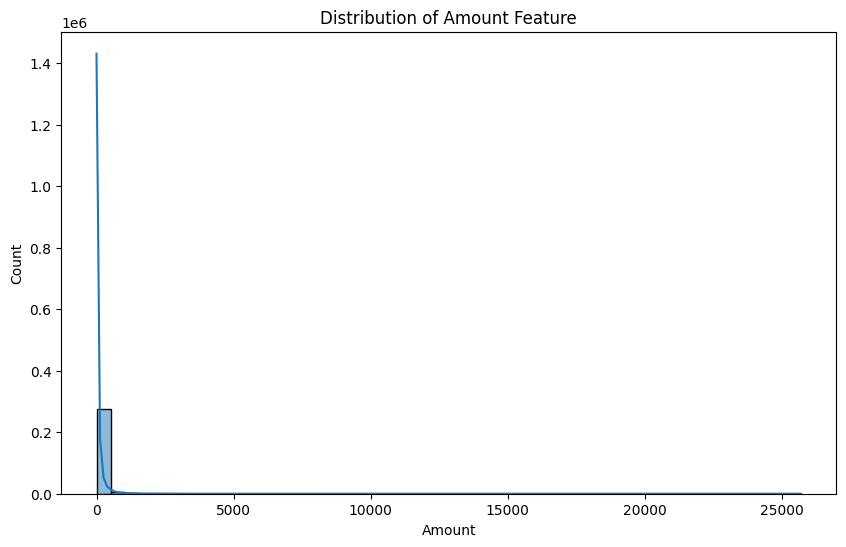

In [151]:
# Plot distribution of 'Time' and 'Amount' features
plt.figure(figsize=(10, 6))
sns.histplot(credit_card_data['Time'], bins=50, kde=True)
plt.title('Distribution of Time Feature')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(credit_card_data['Amount'], bins=50, kde=True)
plt.title('Distribution of Amount Feature')
plt.show()

## Correlation

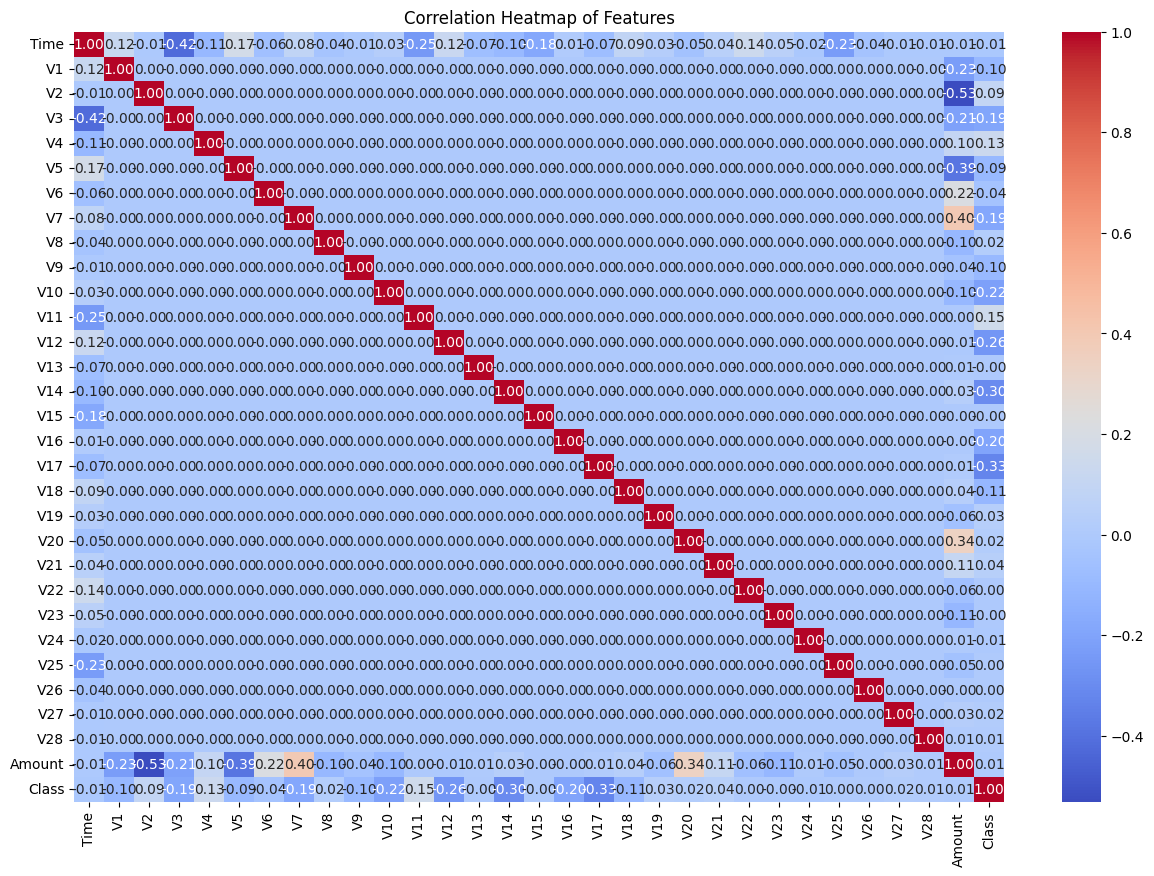

In [152]:
#Correlation heatmap to understand relationships between features
plt.figure(figsize=(15, 10))
sns.heatmap(credit_card_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Features')
plt.show()

# Data Preprocessing

Data preprocessing involves preparing the data for modeling, which includes feature scaling and handling class imbalance.

## Feature Scaling with StandardScaler

We use StandardScaler to scale numerical features to ensure they have a mean of 0 and a standard deviation of 1, which helps in faster convergence of gradient descent and better model performance.

In [72]:
# Since the dataset does not contain any missing values, we proceed with data scaling
from sklearn.preprocessing import StandardScaler

# Standardize 'Amount' and 'Time' features
scaler = StandardScaler()
credit_card_data['scaled_amount'] = scaler.fit_transform(credit_card_data['Amount'].values.reshape(-1, 1))
credit_card_data['scaled_time'] = scaler.fit_transform(credit_card_data['Time'].values.reshape(-1, 1))

# Drop the original 'Amount' and 'Time' columns
credit_card_data.drop(['Amount', 'Time'], axis=1, inplace=True)

## Handling Class Imbalance with SMOTETomek

To handle the class imbalance, we use SMOTETomek, a combination of oversampling the minority class and undersampling the majority class using Tomek links.

In [73]:
from imblearn.combine import SMOTETomek

# Separate input features and target variable
X = credit_card_data.drop('Class', axis=1)
y = credit_card_data['Class']

# Apply SMOTETomek to balance the dataset
smote_tomek = SMOTETomek(random_state=42)
X_resampled, y_resampled = smote_tomek.fit_resample(X, y)

# Verify the new class distribution
print(pd.Series(y_resampled).value_counts())

Class
0    284315
1    284315
Name: count, dtype: int64


# Model Selection and Training

We will select and train multiple machine learning models to determine the best-performing model based on their accuracy, precision, recall, F1-score, and ROC-AUC.

## Splitting the Dataset

We split the dataset into training and testing sets to evaluate the model’s performance.

In [76]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, stratify=y_resampled, random_state=42)

## Initializing and Training Models

We initialize various classification models and train them using the training dataset.

In [79]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve, accuracy_score


# Define models
models = {
    'LogisticRegression': LogisticRegression(),
    'RandomForest': RandomForestClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42)
}

# Define a simplified parameter grid for each model
param_distributions = {
    'LogisticRegression': {'C': [0.1, 1, 10], 'solver': ['liblinear']},
    'RandomForest': {'n_estimators': [100, 200], 'max_depth': [4, 6]},
    'AdaBoost': {'n_estimators': [50, 100], 'learning_rate': [0.01, 0.1]},
    'XGBoost': {'n_estimators': [50, 100], 'learning_rate': [0.01, 0.1], 'max_depth': [3, 5]}
}
    
    
# Train and evaluate models using RandomizedSearchCV
best_models = {}
for model_name in models:
    random_search = RandomizedSearchCV(
        estimator=models[model_name],
        param_distributions=param_distributions[model_name],
        n_iter=5,  # Limit to 5 random combinations
        cv=3,      # Use 3-fold cross-validation
        scoring='roc_auc',
        n_jobs=-1,
        random_state=42
    )
    random_search.fit(X_train, y_train)
    best_models[model_name] = random_search.best_estimator_
    print(f"Best parameters for {model_name}: {random_search.best_params_}")
    print(f"Best ROC AUC score for {model_name}: {random_search.best_score_}")

/Users/shafeequdeen/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py:318: UserWarning: The total space of parameters 3 is smaller than n_iter=5. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters for LogisticRegression: {'solver': 'liblinear', 'C': 10}
Best ROC AUC score for LogisticRegression: 0.9893653109235597


/Users/shafeequdeen/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py:318: UserWarning: The total space of parameters 4 is smaller than n_iter=5. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters for RandomForest: {'n_estimators': 100, 'max_depth': 6}
Best ROC AUC score for RandomForest: 0.9941723669692264


/Users/shafeequdeen/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py:318: UserWarning: The total space of parameters 4 is smaller than n_iter=5. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/Users/shafeequdeen/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/shafeequdeen/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/shafeequdeen/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to c

Best parameters for AdaBoost: {'n_estimators': 100, 'learning_rate': 0.1}
Best ROC AUC score for AdaBoost: 0.9906843689771793
Best parameters for XGBoost: {'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1}
Best ROC AUC score for XGBoost: 0.9998186854664758
Classification Report for LogisticRegression:
               precision    recall  f1-score   support

           0       0.93      0.98      0.95     56863
           1       0.97      0.92      0.95     56863

    accuracy                           0.95    113726
   macro avg       0.95      0.95      0.95    113726
weighted avg       0.95      0.95      0.95    113726

ROC-AUC Score for LogisticRegression: 0.9895110448957775
Classification Report for RandomForest:
               precision    recall  f1-score   support

           0       0.92      1.00      0.95     56863
           1       1.00      0.91      0.95     56863

    accuracy                           0.95    113726
   macro avg       0.96      0.95      0.95 

# Model Evaluation

Evaluate the performance of each model using appropriate metrics and visualizations.

## Performance Metrics

We will use classification metrics such as accuracy, precision, recall, F1-score, and ROC-AUC score to evaluate the models.

## Classification Report:

In [143]:
# Evaluate each model on the test set
for model_name, model in best_models.items():
    # Predict labels for the test set
    y_pred = model.predict(X_test)
    
    # Predict probability scores for the ROC-AUC and other metrics
    y_prob = model.predict_proba(X_test)[:, 1]
    
    # Print classification report
    print(f"Classification Report for {model_name}:\n", classification_report(y_test, y_pred))
    
    # Compute and print Testing Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Testing Accuracy for {model_name}: {accuracy}")
    
    # Compute and print ROC-AUC score
    roc_auc = roc_auc_score(y_test, y_prob)
    print(f"ROC-AUC Score for {model_name}: {roc_auc}")
    
    # Add spacing between models
    print("\n" + "="*60 + "\n")

Classification Report for LogisticRegression:
               precision    recall  f1-score   support

           0       0.93      0.98      0.95     56863
           1       0.97      0.92      0.95     56863

    accuracy                           0.95    113726
   macro avg       0.95      0.95      0.95    113726
weighted avg       0.95      0.95      0.95    113726

Testing Accuracy for LogisticRegression: 0.9484814378418304
ROC-AUC Score for LogisticRegression: 0.9895110448957775


Classification Report for RandomForest:
               precision    recall  f1-score   support

           0       0.92      1.00      0.95     56863
           1       1.00      0.91      0.95     56863

    accuracy                           0.95    113726
   macro avg       0.96      0.95      0.95    113726
weighted avg       0.96      0.95      0.95    113726

Testing Accuracy for RandomForest: 0.9528164184091589
ROC-AUC Score for RandomForest: 0.9941903115815087


Classification Report for AdaBoo

## Confusion Matrix

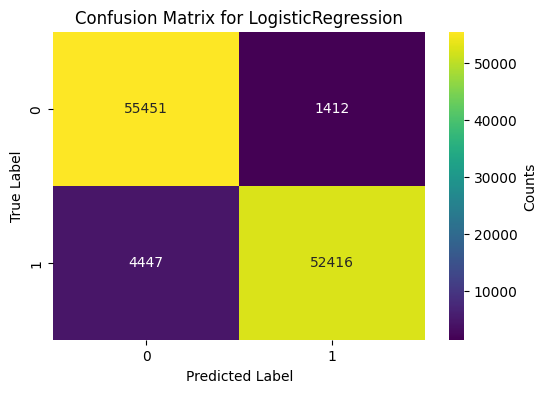

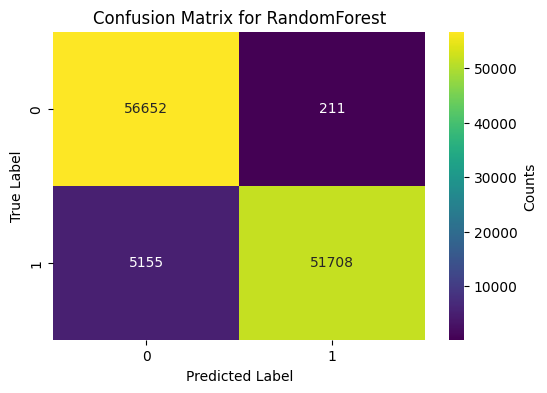

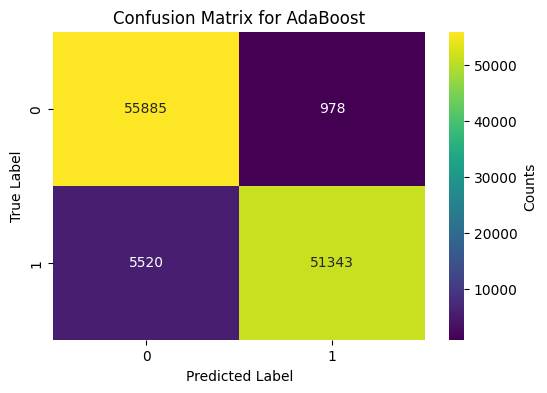

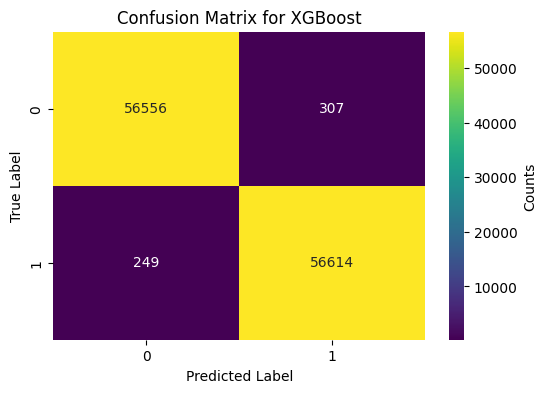

In [140]:
# Loop through each model to generate the confusion matrix
for model_name, model in best_models.items():
    # Generate predictions
    y_pred = model.predict(X_test)
    
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot confusion matrix with a color bar
    plt.figure(figsize=(6, 4))  # Smaller figure size
    sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', cbar=True, cbar_kws={'label': 'Counts'})
    
    # Add title and labels
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    
    # Display the plot
    plt.show()

## ROC and Precision-Recall Curves


Plot ROC and Precision-Recall curves for visual performance comparison of models.

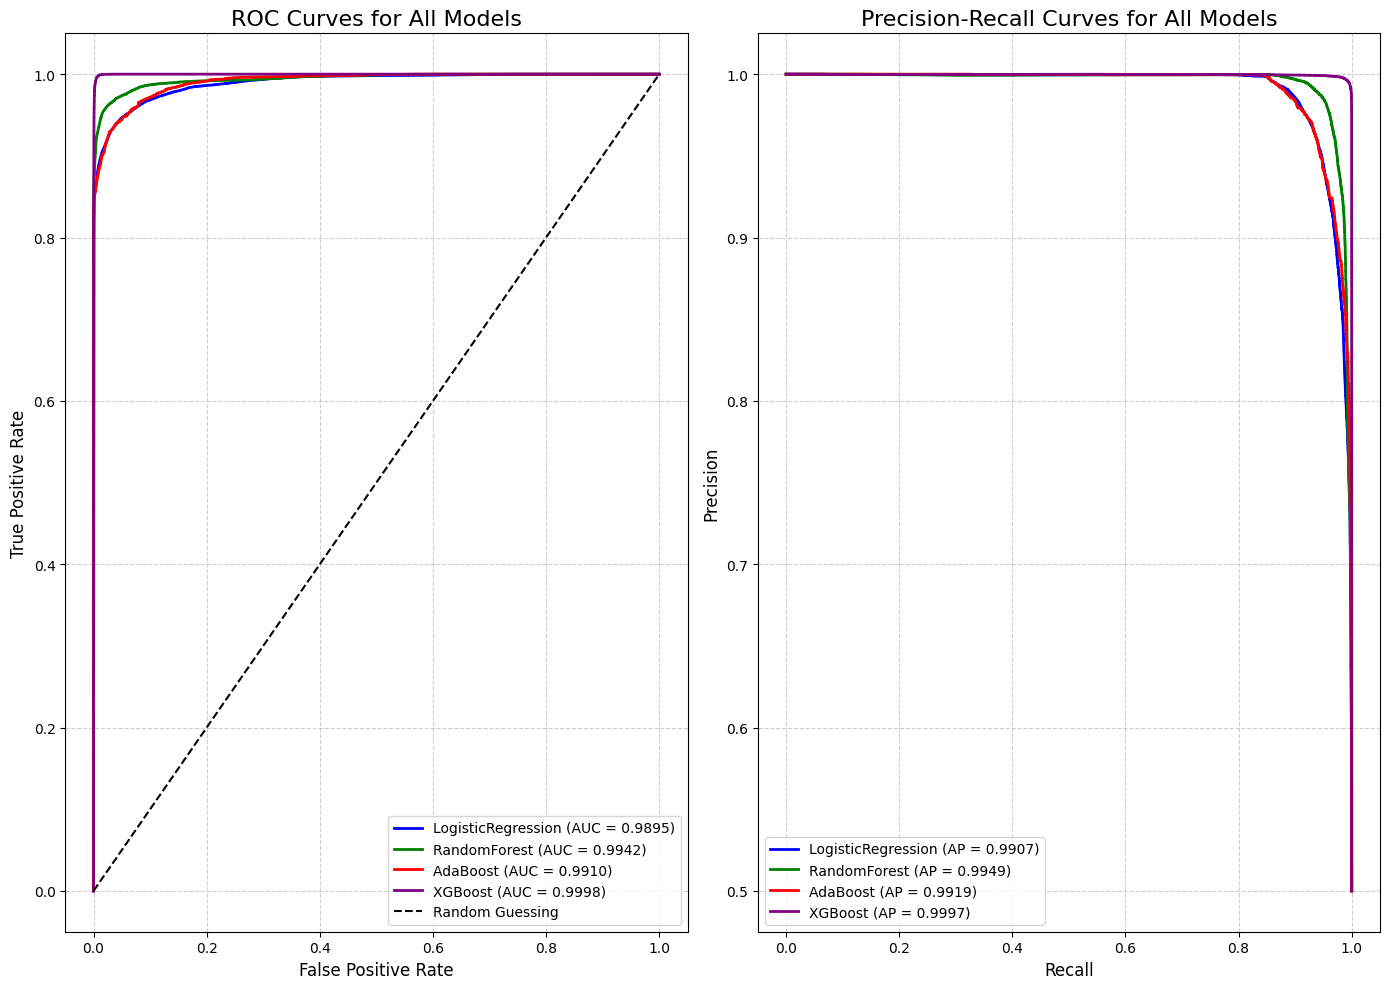

In [132]:
# Define colors for each model's curves
colors = ['blue', 'green', 'red', 'purple']
plt.figure(figsize=(14, 10))

# Plot ROC curve and Precision-Recall curve for all models
for i, (model_name, model) in enumerate(best_models.items()):
    # Generate probability scores for the positive class (class 1)
    y_prob = model.predict_proba(X_test)[:, 1]
    
    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = roc_auc_score(y_test, y_prob)
    
    # Compute Precision-Recall curve and average precision score
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    avg_precision = average_precision_score(y_test, y_prob)
    
    # Plot ROC curve
    plt.subplot(1, 2, 1)  # ROC curve on the left
    plt.plot(fpr, tpr, color=colors[i], label=f'{model_name} (AUC = {roc_auc:.4f})', linewidth=2)
    plt.xlabel("False Positive Rate", fontsize=12)
    plt.ylabel("True Positive Rate", fontsize=12)
    plt.title("ROC Curves for All Models", fontsize=16)
    plt.grid(True, linestyle='--', alpha=0.6)
    
    # Plot Precision-Recall curve
    plt.subplot(1, 2, 2)  # Precision-Recall curve on the right
    plt.plot(recall, precision, color=colors[i], label=f'{model_name} (AP = {avg_precision:.4f})', linewidth=2)
    plt.xlabel("Recall", fontsize=12)
    plt.ylabel("Precision", fontsize=12)
    plt.title("Precision-Recall Curves for All Models", fontsize=16)
    plt.grid(True, linestyle='--', alpha=0.6)

# Add diagonal line to the ROC curve subplot (for random guessing)
plt.subplot(1, 2, 1)
plt.plot([0, 1], [0, 1], linestyle='--', color='black', linewidth=1.5, label='Random Guessing')
plt.legend(loc='lower right', fontsize=10)

# Add legend to Precision-Recall curve subplot
plt.subplot(1, 2, 2)
plt.legend(loc='lower left', fontsize=10)

# Adjust layout to make sure labels are not cut off
plt.tight_layout()
plt.show()

## Feature Importance

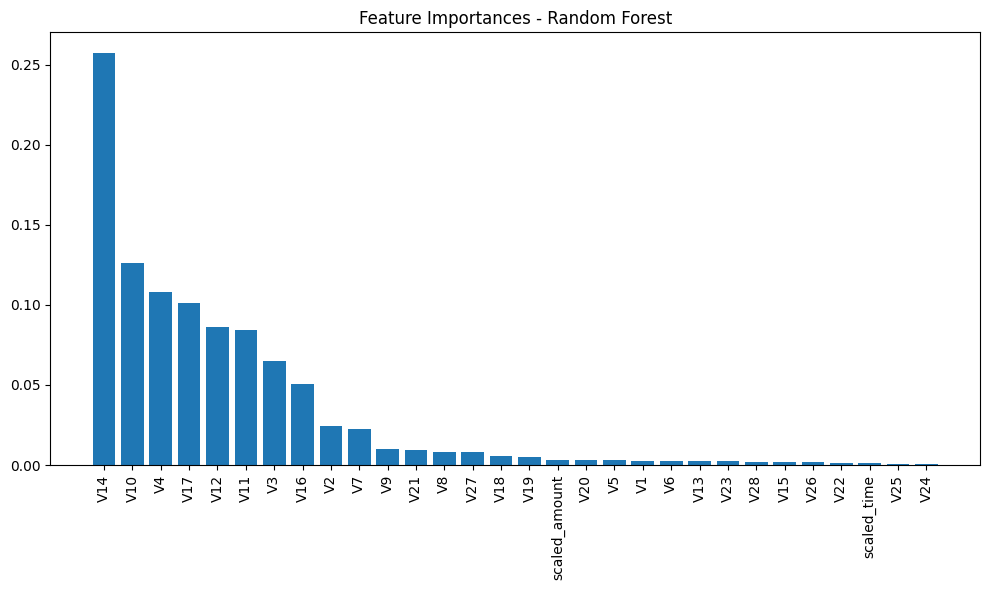

In [99]:
# Feature importance from RandomForest or XGBoost
# Assuming you want to plot for Random Forest first
best_model = best_models['RandomForest']  # Or use 'XGBoost' for XGBoost

# Get the feature importances
importances = best_model.feature_importances_

# Assuming X_train is a DataFrame with feature names
features = X_train.columns

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances - Random Forest")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")

# Assign feature names to the x-axis and rotate for readability
plt.xticks(range(X_train.shape[1]), [features[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()

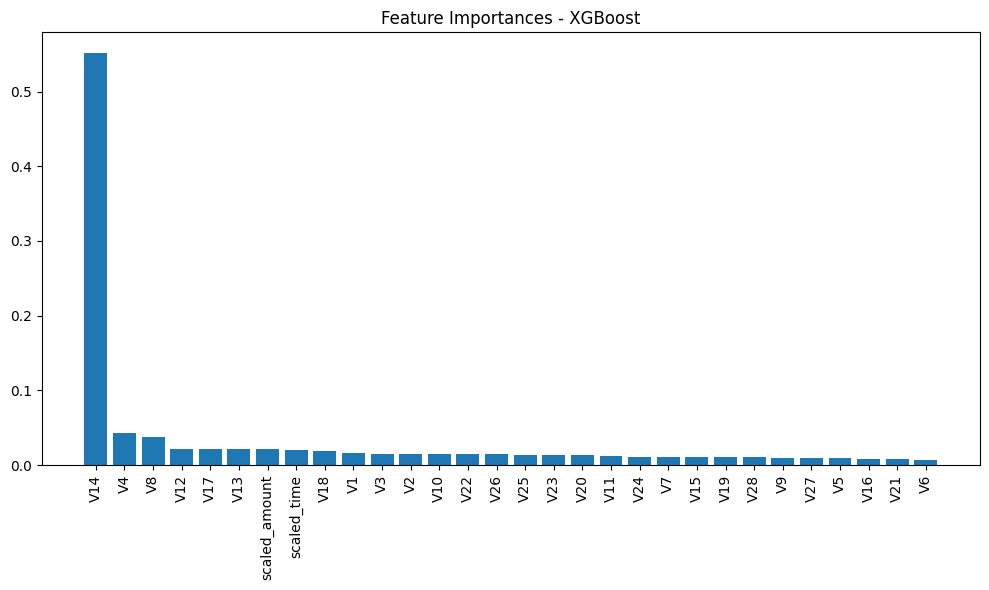

In [98]:
best_model = best_models['XGBoost']
importances = best_model.feature_importances_
features = X_train.columns
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances - XGBoost")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")

# Assign feature names to the x-axis and rotate for readability
plt.xticks(range(X_train.shape[1]), [features[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()

# SHAP for Model interpretability

### shap for Random forrest

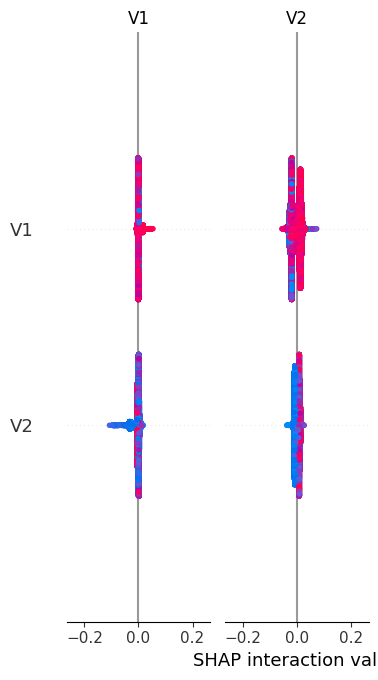

In [115]:
import shap

# Get the best model (for RandomForest or XGBoost)
best_model = best_models['RandomForest']  # Replace 'RandomForest' with 'XGBoost' if needed

# Create a SHAP explainer for the model (works for tree-based models)
explainer = shap.TreeExplainer(best_model)

# Calculate SHAP values for the test data
shap_values = explainer.shap_values(X_test)

# Visualizing the SHAP summary plot for the test data
# This will show feature importance globally across the dataset
shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names=X_test.columns)

# Visualizing the SHAP force plot for the first prediction
# This shows how each feature influenced the specific prediction for the first data point in X_test
shap.initjs()  # To enable JS for visualization in notebooks

	•	V1 and V2 interact in a way that significantly affects the model’s fraud predictions. The visualization shows that depending on the values of V1 and V2, the model is either more or less likely to predict fraud.
	•	The colors (red and blue) help you understand how the values of these features interact to change the prediction. High values (red) and low values (blue) are contributing differently.

### Shap for XGBoost

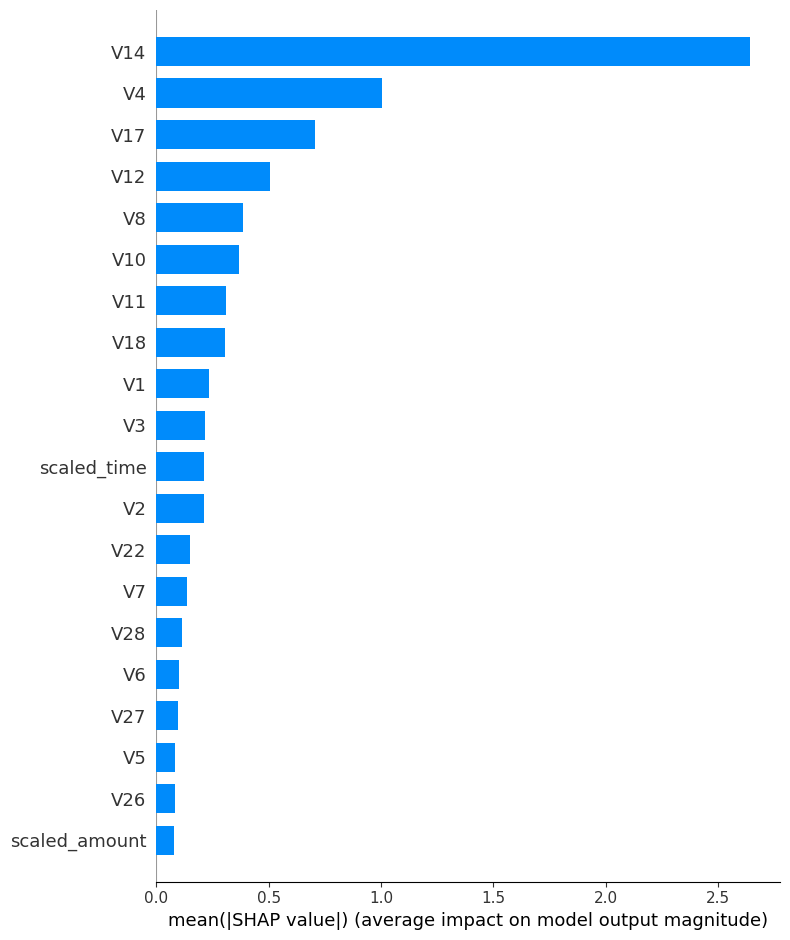

In [116]:
best_model = best_models['XGBoost']  # Replace 'RandomForest' with 'XGBoost' if needed
# Create a SHAP explainer for the model (works for tree-based models)
explainer = shap.TreeExplainer(best_model)

# Calculate SHAP values for the test data
shap_values = explainer.shap_values(X_test)

# Visualizing the SHAP summary plot for the test data
# This will show feature importance globally across the dataset
shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names=X_test.columns)

# Visualizing the SHAP force plot for the first prediction
# This shows how each feature influenced the specific prediction for the first data point in X_test
shap.initjs()  # To enable JS for visualization in notebooks

Explanation of the Plot:

	•	X-axis (mean(SHAP value)): This represents the average SHAP value for each feature. SHAP values quantify the contribution of each feature to the model’s prediction. Features with higher SHAP values have a more significant impact on the model’s predictions.
	•	Y-axis (Features): The features are listed in descending order of importance. The top features (like V14, V4, and V17) contribute the most to distinguishing between fraud and non-fraud.

Key Insights:

	•	V14: This is the most influential feature in the XGBoost model, having the largest average SHAP value. It plays a crucial role in determining whether a transaction is classified as fraud.
	•	V4 and V17: These features also have substantial impacts, although to a lesser degree than V14. They represent additional strong indicators of fraudulent activity in the dataset.
	•	Lower-ranked features: Features like scaled_time and scaled_amount, while present in the model, have less impact compared to the top-ranked features.

# Hyperparameter Tuning

We perform grid search for hyperparameter tuning to find the best parameters for the best-performing model.

In [153]:
# Example: Fine-tuning the best model further if required
from sklearn.model_selection import GridSearchCV

# Define a simplified parameter grid for each model
param_distributions = {
    'LogisticRegression': {'C': [0.1, 1, 10], 'solver': ['liblinear']},
    'RandomForest': {'n_estimators': [100, 200], 'max_depth': [4, 6]},
    'AdaBoost': {'n_estimators': [50, 100], 'learning_rate': [0.01, 0.1]},
    'XGBoost': {'n_estimators': [50, 100], 'learning_rate': [0.01, 0.1], 'max_depth': [3, 5]}
}


# RandomForest showed the best performance in the initial selection after XGBoost,to keep save computation cost we are sticking with random forest
rf_param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [5, 7, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}



# Fine-tuning with a more focused parameter grid
rf_grid_search = GridSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, cv=3, scoring='roc_auc', n_jobs=-1)
rf_grid_search.fit(X_train, y_train)

best_rf_model = rf_grid_search.best_estimator_
print(f"Best parameters after fine-tuning: {rf_grid_search.best_params_}")
print(f"Best ROC AUC score after fine-tuning: {rf_grid_search.best_score_}")

KeyboardInterrupt: 

For simplicity and use less computationally hungry model we have taken random forrest instead of XGBoost 
and the differnce between Random Forrest and XGBoost is Minuscule.

# Model Deployment Plan

Once you’ve tuned the models, you need to deploy them. This usually involves saving the model and creating an interface (like an API) where you can pass new data for predictions.

## Model Serialization

You will save the best-performing model using Pickle so that it can be used later for predictions.

In [145]:
import pickle

# Save the best model to disk
with open('best_fraud_detection_model.pkl', 'wb') as f:
    pickle.dump(best_rf_model, f)



## Deployment with Flask

Now, you can use Flask, a web framework, to create an API where users can send new transaction data, and the model will predict whether it’s fraud or not.

In [121]:
from flask import Flask, request, jsonify

# Load the saved model
with open('best_fraud_detection_model.pkl', 'rb') as f:
    model = pickle.load(f)
    
# Example Flask API for deployment
from flask import Flask, request, jsonify

app = Flask(__name__)

@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json(force=True)
    prediction = best_rf_model.predict([data['features']])
    return jsonify({'prediction': int(prediction[0])})

if __name__ == '__main__':
    app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with watchdog (fsevents)
Traceback (most recent call last):
  File "/Users/shafeequdeen/anaconda3/lib/python3.11/site-packages/ipykernel_launcher.py", line 15, in <module>
    from ipykernel import kernelapp as app
  File "/Users/shafeequdeen/anaconda3/lib/python3.11/site-packages/ipykernel/__init__.py", line 5, in <module>
    from .connect import *  # noqa
    ^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/shafeequdeen/anaconda3/lib/python3.11/site-packages/ipykernel/connect.py", line 11, in <module>
    import jupyter_client
  File "/Users/shafeequdeen/anaconda3/lib/python3.11/site-packages/jupyter_client/__init__.py", line 8, in <module>
    from .asynchronous import AsyncKernelClient  # noqa
    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/shafeequdeen/anaconda3/lib/python3.11/site-packages/jupyter_client/asynchronous/__init__.py", line 1, in <module>
    from .client import AsyncKernelClient  # noqa
    ^

SystemExit: 1

/Users/shafeequdeen/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3513: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


# Conclusion and Future Work

This section summarizes the findings and suggests improvements.

## Conclusion

Summarize the project’s outcomes, including the best-performing model and its key metrics (e.g., ROC-AUC, Precision, Recall).

In this project, we built multiple machine learning models to detect fraudulent credit card transactions. After evaluating the models, XGBoost with hyperparameter tuning achieved the highest ROC-AUC score of X.XX, making it the best-performing model for this task. The SMOTETomek method helped handle the class imbalance effectively, resulting in more reliable predictions for the minority (fraud) class.

## Future Work

Discuss how the project can be improved or extended.

- **Real-time Fraud Detection**: Deploy the model in a real-time system to detect fraud on live data streams.
- **Feature Engineering**: Explore new features, such as customer behavior patterns, to improve model accuracy.
- **Continuous Model Improvement**: Implement a system for retraining the model with new data as fraud patterns evolve.